# PERCEPTRON LEARNING ALGORITHM (PLA)
1. Thuật toán PLA là thuật toán đơn giản thiết kế cho bài toán phân lớp nhị phân (binary classification) chỉ với hai lớp dữ liệu.
2. PLA tìm một ranh rới siêu phẳng cho bài toán phân lớp nhị phân, với giả sử tồn tại ranh rới đó. Nếu hai lớp dữ liệu có thể được phân chia hoàn toàn bởi một siêu phẳng , ta nói rằng hai lớp đó linearly separable. Có rất nhiều ranh rới như vậy bài toán sẽ có vô số nghiệm.
3. Ta sẽ xây dựng một ranh rới siêu phẳng, với điểm dữ liệu chưa được gán nhãn, ta có thể xác định nhãn của nó, bằng cách sử dụng hàm dấu sgn(x).

# 1.Ví dụ đơn giản phân chia dữ liệu trong không gian hai chiều.

Chuẩn bị dữ liệu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
means = [[-1, 0], [1, 0]]
cov   = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
print("X0:",X0)
print("X1:",X1)
X = np.concatenate((X0,X1), axis=0)
print("X:",X)
# tao ma tran mo rong X_bar
X_bar = np.concatenate((np.ones((2*N,1)), X), axis=1)
print(X_bar)
# tao nhan cua du lieu y
y = np.concatenate((-1*np.ones(N),np.ones(N)))
print(y)
# khởi tạo w_init
w_init = np.random.randn(X_bar.shape[1])
print("w_init:",w_init)

X0: [[-0.86489458 -0.06513986]
 [-1.77593527 -0.11636704]
 [-1.69997267 -1.41780454]
 [-0.89836937 -0.55327157]
 [-0.03128398  0.44628991]
 [-1.84945626  0.09434468]
 [-1.42498781 -1.1025456 ]
 [-0.76368007 -0.18658777]
 [-0.99178805 -0.56111929]
 [-1.53551019 -0.3826278 ]]
X1: [[ 1.04504239  1.38380136]
 [ 1.04000424 -0.07764421]
 [ 1.63835101  0.92540778]
 [ 0.88825824  0.11425512]
 [ 2.36261866  0.55670277]
 [ 0.48616594 -0.4519177 ]
 [ 0.54696282 -0.22129035]
 [ 1.29715848  0.5941249 ]
 [ 0.37986865  0.26242174]
 [ 1.44313709  0.44420401]]
X: [[-0.86489458 -0.06513986]
 [-1.77593527 -0.11636704]
 [-1.69997267 -1.41780454]
 [-0.89836937 -0.55327157]
 [-0.03128398  0.44628991]
 [-1.84945626  0.09434468]
 [-1.42498781 -1.1025456 ]
 [-0.76368007 -0.18658777]
 [-0.99178805 -0.56111929]
 [-1.53551019 -0.3826278 ]
 [ 1.04504239  1.38380136]
 [ 1.04000424 -0.07764421]
 [ 1.63835101  0.92540778]
 [ 0.88825824  0.11425512]
 [ 2.36261866  0.55670277]
 [ 0.48616594 -0.4519177 ]
 [ 0.54696282 -

# Hiển thị dữ liệu
Rõ ràng dữ liệu này tồn tại một ranh rới, dữ liệu là linearly separable

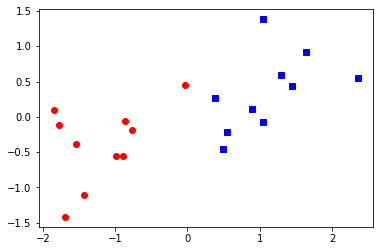

In [2]:
plt.plot(X0[:,0],X0[:,1],'ro')
plt.plot(X1[:,0],X1[:,1],'bs')
plt.show()

Hàm dự đoán khi có điểm dữ liệu mới

In [3]:
def predict(w, X):
    return np.sign(X.dot(w))

In [4]:
print(predict(w_init,X_bar))

[ 1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


Thuật toán perceptron

In [5]:
def perceptron(X, y, w_init):
    w = w_init
    while True:
        pred = predict(w,X)
        mis_idxs = np.where(np.equal(pred,y)==False)[0]
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w
        random_id = np.random.choice(mis_idxs,1)[0]
        #update w
        w = w + y[random_id]*X[random_id]
        

In [6]:
w = perceptron(X_bar,y,w_init)
print("Nghiệm của bài toán:",w)

Nghiệm của bài toán: [-0.0241345   2.75290157 -0.33089387]


test lại kết quả

In [7]:
print(predict(w,X_bar))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


# 2. Sử dụng thư viện sklearn.

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
clf = Perceptron(tol=1e-3, random_state=0)

In [10]:
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
clf.score(X, y)
print("Nghiệm w của bài toán:",clf.coef_[0],clf.intercept_)

Nghiệm w của bài toán: [ 2.23018511 -0.36673737] [0.]


In [12]:
X_pre = np.random.multivariate_normal(means[0], cov, 3)
#X_pre = np.concatenate((np.ones((3,1)),X_pre),axis=1)
print(X_pre)
clf.predict(X_pre)

[[-0.96940318 -0.29924949]
 [-1.38226056 -0.51351831]
 [-0.46840885  0.25038162]]


array([-1., -1., -1.])

# 3. Bài toán phân loại chữ số.
Bộ dữ liệu sklearn.datasets.load_digits

10 class : số 0 đến số 9

Mỗi class khoảng 180 số, tổng số dữ liệu : 1797

Một feature có kích cỡ là 64: mảng số nguyên từ 0 đến 16


In [13]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_digits, y_digits = load_digits(return_X_y=True)

In [14]:
print(X_digits)
print(X_digits.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [15]:
print(y_digits)
print(y_digits.shape)
print(y_digits[20])

[0 1 2 ... 8 9 8]
(1797,)
0


Phân lớp dữ liệu chữ số 0 và 1

In [16]:
index_0 = []
index_1 = []
for i in range(y_digits.shape[0]):
    if y_digits[i] == 0:
        index_0.append(i)
    if y_digits[i] == 1:
        index_1.append(i)

In [17]:
print(index_0)
print(len(index_1))

[0, 10, 20, 30, 36, 48, 49, 55, 72, 78, 79, 101, 126, 130, 140, 150, 160, 166, 178, 179, 185, 202, 208, 209, 229, 252, 256, 266, 276, 286, 292, 304, 305, 311, 328, 334, 335, 357, 382, 386, 396, 406, 416, 422, 434, 435, 441, 458, 464, 465, 487, 512, 516, 526, 536, 546, 552, 564, 565, 571, 588, 594, 595, 617, 642, 646, 656, 666, 676, 682, 694, 695, 701, 718, 724, 725, 747, 772, 776, 786, 796, 806, 812, 824, 825, 831, 848, 854, 855, 877, 902, 915, 925, 935, 941, 957, 974, 980, 981, 1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082, 1099, 1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205, 1206, 1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317, 1323, 1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425, 1435, 1445, 1451, 1463, 1464, 1470, 1487, 1493, 1494, 1516, 1541, 1545, 1555, 1563, 1573, 1579, 1591, 1592, 1598, 1615, 1620, 1642, 1663, 1667, 1677, 1687, 1697, 1703, 1715, 1716, 1722, 1739, 1745, 1746, 1768, 1793]
182


In [18]:
X_0 = np.array([X_digits[i] for i in (index_0)])
X_1  = np.array([X_digits[i] for i in (index_1)])
X = np.concatenate((X_0,X_1),axis = 0)
print(X)
print(X.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 [ 0.  0.  3. ...  4.  0.  0.]
 ...
 [ 0.  0.  1. ... 10.  0.  0.]
 [ 0.  0.  8. ...  7.  0.  0.]
 [ 0.  0.  6. ...  4.  0.  0.]]
(360, 64)


In [19]:
print(X_0)

[[0. 0. 5. ... 0. 0. 0.]
 [0. 0. 1. ... 3. 0. 0.]
 [0. 0. 3. ... 4. 0. 0.]
 ...
 [0. 0. 9. ... 4. 0. 0.]
 [0. 0. 5. ... 8. 1. 0.]
 [0. 0. 6. ... 6. 0. 0.]]


In [20]:
print(X_1.shape)

(182, 64)


In [21]:
y_0 = np.array([0]*len(index_0))
y_1 = np.array([1]*len(index_1))
y = np.concatenate((y_0,y_1))
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(360,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print(y_test)

[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0]


In [23]:
per_model = Perceptron(tol=1e-3, random_state=0)

In [24]:
per_model.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_pred = per_model.predict(X_test)
print(y_pred)

[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0]


score của mô hình

In [26]:
per_model.score(X_train, y_train)
print("Accuracy:", 100*accuracy_score(y_test,y_pred),"%")

Accuracy: 100.0 %


# 4. Phân loại trên toàn bộ dữ liệu

In [27]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
clf.score(X, y)
print(clf.coef_[0])

(1797, 64)
(1797,)
[   0.  -12.  -38.   17.  -21. -109.  -56.   -2.    0.  -37.  -11.    4.
   51.   79.  -30.   -5.    0.   -7.   65.  -31. -101.  116.    5.    0.
    0.   16.   18.  -58. -178.    7.   17.    0.    0.   41.   53.  -74.
 -203.  -40.   -8.    0.   -3.  -15.   57.  -93.  -83.    7.   21.    0.
    0.  -33.   14.   -7.   19.  -23.  -57.  -12.    0.  -13.  -66.   15.
  -48.  -58.  -53.  -14.]


score của mô hình: 0.9393433500278241